<span style="font-size:30px; font-weight:bold;">Exercise 3: Build a Covid uncertainty index</span>

**Part 1**

In [1]:
import pandas as pd

# Read csv file
nyt = pd.read_csv('NYT_headlines.csv')

# Drop duplicates in headlines 
nyt = nyt.drop_duplicates(subset=['Headlines'])

**Part 2**

In [2]:
# Group headlines by date and then convert each headline into a list
nyt_date = nyt.groupby('date')['Headlines'].apply(list).reset_index()

**Part 3**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
# Convert list of strings into a combined single string
nyt_date['Headlines_string'] = nyt_date['Headlines'].apply(lambda x: ' '.join(x))

In [5]:
# Convert text to word frequency counts to create bag of words model for uni-gram, bi-gram, and tri-gram to find 
# meaningful word combinations 
vectorizer = CountVectorizer(ngram_range=(1, 3), min_df=2) # min_df=2 removes n-grams (phrases) that appear only 
                                                           # once keeping only phrases that appear more frequently  
    
# Convert text to numerical bag of words matrix (word frequency matrix)
X_counts = vectorizer.fit_transform(nyt_date['Headlines_string'])

In [6]:
# Compute TF-IDF matrix
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [7]:
# Compute similarity matrix
similarity_matrix = cosine_similarity(X_tfidf)

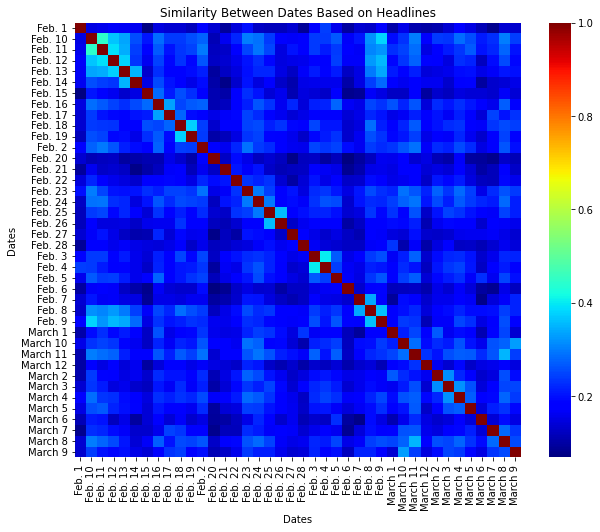

In [8]:
# Create heatmap to visualize similarity between dates
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="jet", annot=False, xticklabels=nyt_date['date'], yticklabels=nyt_date['date'])
plt.title("Similarity Between Dates Based on Headlines")
plt.xlabel("Dates")
plt.ylabel("Dates")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Dates with the highest similarity were February 3 and 4, February 10 and 11, and February 11 and 12. Headlines on the 3rd and 4th covered a wide range of topics however a lot of them were focused around health concerns (Covid-19 impacting communities, workplaces, and the government), the Covid-19 vaccine rollouts, and political issues concerning Trump, Biden, and the Capitol Hill riot. As well as international news relating the Russia and Ukraine war, U.S. ending their support to Saudi in the war with Yemen, and allowing refugees from Afghanistan. February 10, 11 and 12 also had similar headlines pertaining Covid-19 news such as the impact it had on businesses and economies, as well the vaccine rollout. It also had lots of headlines about Trump and Biden due to the second impeachment of Trump which ended on February 13, as well as what Biden has been doing post inuaguration which happened on January 20. They most likely talked a lot about the impeachment as a whole and its conclusion. As well as what the outlook is for Trump after losing the election, and what the future looks like for america with Biden as the new president. 

**Part 4**

In [9]:
# Build a vocabulary of Covid-19 related words

covid_vocabulary = [
    "COVID-19", "SARS-CoV-2", "coronavirus", "variant", "mutation", "pandemic",
    "outbreak", "infected", "symptoms", "respiratory", "vaccine", "vaccination",
    "immunization", "booster", "efficacy", "antibody", "testing", "PCR test", "rapid test",
    "quarantine", "isolation", "social distancing", "PPE", "face mask", "ventilator", "hospitalization",
    "lockdown", "stay-at-home orders", "curfew", "contact tracing", "self-isolation", "health guidelines",
    "travel restrictions", "herd immunity", "flattening the curve", "EUA", "government response",
    "stimulus package", "economic relief", "public health policy", "state of emergency", "mask mandate",
    "unemployment", "economic recovery", "remote work", "education closure", "mental health", "social impact",
    "supply chain disruption", "poverty", "Delta variant", "Omicron variant", "Alpha variant", "Beta variant",
    "Gamma variant", "mutations", "case count", "mortality rate", "infected rate", "recovered", "death toll",
    "hospital capacity", "transmission rate", "lockdown measures", "international travel", 
    "global vaccination efforts", "WHO", "CDC", "UN", "NHS", "USA", "UK", "India"
]

**Part 5**

In [10]:
# Function to check if a headline contains any covid-related word
def contains_covid_related_terms(headline):
    return any(word in headline.lower() for word in covid_vocabulary)

# Apply function to check for covid-related articles for each day
nyt_date['covid_related'] = nyt_date['Headlines_string'].apply(lambda x: sum(contains_covid_related_terms(x) for x in x.split()))

# Calculate the Covid Uncertainty Index (CUI) by estimating the relative fraction of covid-related articles
nyt_date['CUI'] = nyt_date['covid_related'] / nyt_date['Headlines_string'].apply(lambda x: len(x.split()))

**Part 6**

In [11]:
# Create vocabulary of economic policy related words
economic_policy_vocabulary = ["uncertainty", "uncertain", "economic", "economy", "Congress", "deficit", 
                              "Federal Reserve", "legislation", "regulation", "White House", "uncertainties", 
                              "regulatory", "the Fed"]

# Check if headline contains any economic policy related words 
def contains_economic_policy_related_terms(headline):
    return any(word in headline.lower() for word in economic_policy_vocabulary)

# Count number of economic policy related words for each day in combined headlines string
nyt_date['economic_policy_related'] = nyt_date['Headlines_string'].apply(
                                    lambda x: sum(contains_economic_policy_related_terms(x) for x in x.split()))

# Calculate coarse economic policy uncertainty index (CEPUI) by taking the fraction of number of articles 
# containing economic policy related words to the total number of words in combined headlines 
nyt_date['CEPU'] = nyt_date['economic_policy_related'] / nyt_date['Headlines_string'].apply(lambda x: len(x.split()))

nyt_date

,date,Headlines,Headlines_string,covid_related,CUI,economic_policy_related,CEPU
0,Feb. 1,[Inquiry Has Not Found Evidence to Charge Offi...,Inquiry Has Not Found Evidence to Charge Offic...,0,0.000000,0,0.000000
1,Feb. 10,[After Three Years in a Church Facing Deportat...,After Three Years in a Church Facing Deportati...,3,0.006186,0,0.000000
2,Feb. 11,[Former Lincoln Project Workers Ask to Be Rele...,Former Lincoln Project Workers Ask to Be Relea...,5,0.012563,0,0.000000
3,Feb. 12,"[Inside a Nursing Home After the Vaccine: Joy,...","Inside a Nursing Home After the Vaccine: Joy, ...",6,0.019481,0,0.000000
4,Feb. 13,[White House Press Aide Resigns Over Call to R...,White House Press Aide Resigns Over Call to Re...,0,0.000000,0,0.000000
5,Feb. 14,[Biden Takes Center Stage With Ambitious Agend...,Biden Takes Center Stage With Ambitious Agenda...,0,0.000000,0,0.000000
6,Feb. 15,[Heavy snow forecast for the Great Lakes regio...,Heavy snow forecast for the Great Lakes region...,0,0.000000,0,0.000000
7,Feb. 16,[Garbage Truck Driver Is Charged in California...,Garbage Truck Driver Is Charged in California ...,2,0.006098,1,0.003049
8,Feb. 17,[U.S. Seizes One Million More Counterfeit N95 ...,U.S. Seizes One Million More Counterfeit N95 M...,0,0.000000,0,0.000000
9,Feb. 18,"[How to Help People in Texas, Oklahoma and Lou...","How to Help People in Texas, Oklahoma and Loui...",5,0.011574,0,0.000000


**Part 7**

This method is not a good way of assessing the economic policy uncertainty due to the limitation that it only counts the occurence of an economic policy related word in a headline without the context of which it's in. The word 'economy' may appear in a headline but the headline might not have to do anything with economic policy decisions, and could just be mentioning the economy in a general sense. Also, words such as 'Congress', 'Federal Reserve', 'the Fed', 'regulation', or 'deficit' could appear in a headline that has nothing to do with economic policy uncertainty, but rather just about policies alone. They're quite broad and could be used in many different articles causing potential bias, such as 'deficit reduction', which may have nothing to do with policy uncertainty. This limitation can overestimate/underestimate the real level of uncertainty index. Also, this measure doesn't have any quantitative aspect to measure uncertainty, such as volatiltiy in financial markets or economic forecasts.

**Part 8**

In [12]:
# Read SP500 file
sp500 = pd.read_csv('/Users/capi/Documents/GitHub/eco482/SP500.csv')

# Rename Adj Close**
sp500 = sp500.rename(columns = {'Date': 'date', 'Adj Close**': 'Adj Close'})

# Replace comma in Adj Close and convert to float
sp500['Adj Close'] = sp500['Adj Close'].replace({',': ''}, regex=True).astype(float)

# Compute daily return on S&P500 (GSPC) as a percentage change 
sp500['Daily_Return'] = sp500['Adj Close'].pct_change()

sp500

,date,Open,High,Low,Close*,Adj Close,Volume,Daily_Return
0,12-Mar-21,"3,924.52","3,944.99","3,915.21","3,943.34",3943.34,"4,469,240,000",NaN
1,11-Mar-21,"3,915.54","3,960.27","3,915.54","3,939.34",3939.34,"5,300,010,000",-0.001014
2,10-Mar-21,"3,891.99","3,917.35","3,885.73","3,898.81",3898.81,"5,827,250,000",-0.010289
3,9-Mar-21,"3,851.93","3,903.76","3,851.93","3,875.44",3875.44,"5,496,340,000",-0.005994
4,8-Mar-21,"3,844.39","3,881.06","3,819.25","3,821.35",3821.35,"5,852,240,000",-0.013957
5,5-Mar-21,"3,793.58","3,851.69","3,730.19","3,841.94",3841.94,"6,842,570,000",0.005388
6,4-Mar-21,"3,818.53","3,843.67","3,723.34","3,768.47",3768.47,"7,142,240,000",-0.019123
7,3-Mar-21,"3,863.99","3,874.47","3,818.86","3,819.72",3819.72,"6,150,790,000",0.013600
8,2-Mar-21,"3,903.64","3,906.41","3,868.57","3,870.29",3870.29,"5,493,690,000",0.013239
9,1-Mar-21,"3,842.51","3,914.50","3,842.51","3,901.82",3901.82,"5,071,540,000",0.008147


**Part 9**

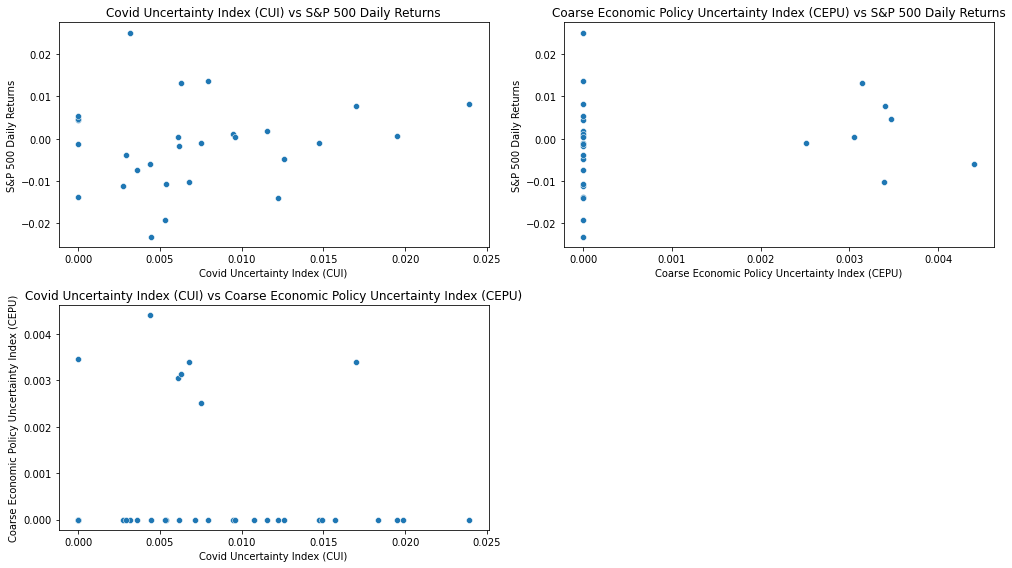

,CUI,CEPU,Daily_Return
CUI,1.000000,-0.035255,0.155192
CEPU,-0.035255,1.000000,0.136831
Daily_Return,0.155192,0.136831,1.000000


In [13]:
# Replace period with whitespace and add year '2021'
nyt_date['date'] = nyt_date['date'].apply(lambda x: x.replace('.', '') + ' 2021')

# Replace full month names with abbreviated names (e.g., 'March' -> 'Mar')
month_mapping = {'March': 'Mar'}

nyt_date['date'] = nyt_date['date'].apply(lambda x: ' '.join([month_mapping.get(word, word) for word in x.split()]))

# Convert the date column into datetime format
nyt_date['date'] = pd.to_datetime(nyt_date['date'], format='%b %d %Y', errors='coerce')

# Format the date to 'd-MMM-yy' format (e.g., '3-Feb-21')
nyt_date['date'] = nyt_date['date'].dt.strftime('%-d-%b-%y')

# Merge the two datasets 
merged_df = pd.merge(nyt_date[['date', 'CUI', 'CEPU']], sp500[['date', 'Daily_Return']], on = 'date', how = 'left')

# Plot the data
plt.figure(figsize = (14, 8))

# Plot CUI vs S&P 500 Daily Returns
plt.subplot(2, 2, 1)
sns.scatterplot(x=merged_df['CUI'], y=merged_df['Daily_Return'])
plt.title('Covid Uncertainty Index (CUI) vs S&P 500 Daily Returns')
plt.xlabel('Covid Uncertainty Index (CUI)')
plt.ylabel('S&P 500 Daily Returns')

# Plot CEPU vs S&P 500 Daily Returns
plt.subplot(2, 2, 2)
sns.scatterplot(x=merged_df['CEPU'], y=merged_df['Daily_Return'])
plt.title('Coarse Economic Policy Uncertainty Index (CEPU) vs S&P 500 Daily Returns')
plt.xlabel('Coarse Economic Policy Uncertainty Index (CEPU)')
plt.ylabel('S&P 500 Daily Returns')

# Plot CUI vs CEPU
plt.subplot(2, 2, 3)
sns.scatterplot(x=merged_df['CUI'], y=merged_df['CEPU'])
plt.title('Covid Uncertainty Index (CUI) vs Coarse Economic Policy Uncertainty Index (CEPU)')
plt.xlabel('Covid Uncertainty Index (CUI)')
plt.ylabel('Coarse Economic Policy Uncertainty Index (CEPU)')

plt.tight_layout()
plt.show()

# Correlations between CUI, CEPU, and S&P 500 Daily Returns
correlation_matrix = merged_df[['CUI', 'CEPU', 'Daily_Return']].corr()

correlation_matrix

**Part 10**

<Figure size 864x432 with 0 Axes>

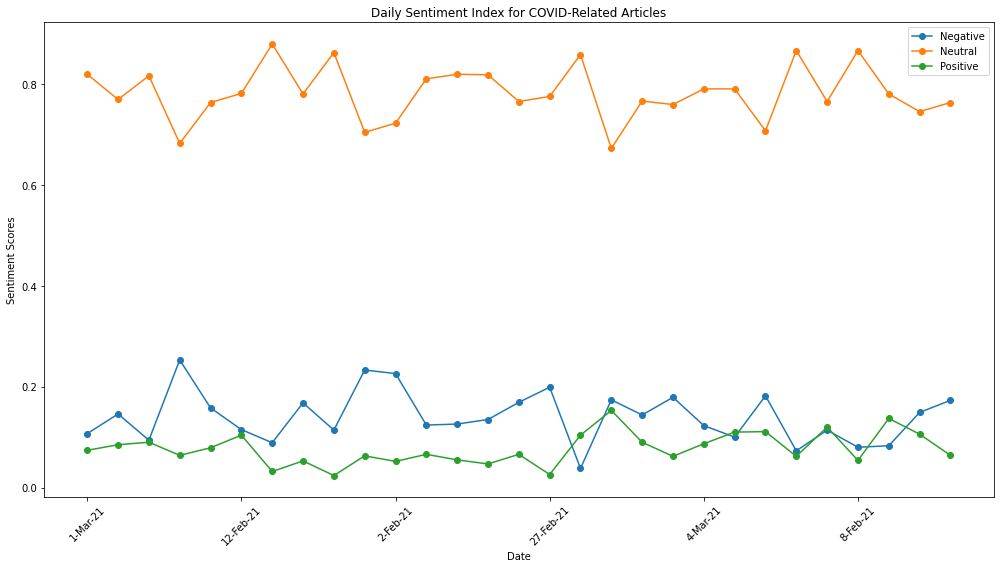

Negative    0.140276
Neutral     0.782448
Positive    0.077241
dtype: float64

In [14]:
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment for a single text
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['neg'], sentiment['neu'], sentiment['pos']

# Select articles that contain at least one word in the COVID related word vocabulary
covid_related_articles = nyt_date[nyt_date['Headlines_string'].apply(lambda x: any(word in x.lower() for word in covid_vocabulary))]

# Calculate sentiment scores for each article (Negative, Neutral, Positive)
covid_related_articles = covid_related_articles.assign(
    Negative=covid_related_articles['Headlines_string'].apply(lambda x: get_sentiment(x)[0]),
    Neutral=covid_related_articles['Headlines_string'].apply(lambda x: get_sentiment(x)[1]),
    Positive=covid_related_articles['Headlines_string'].apply(lambda x: get_sentiment(x)[2])
)

# Remove rows with missing values in sentiment columns (if any)
covid_related_articles = covid_related_articles.dropna(subset=['Negative', 'Neutral', 'Positive'])

# Calculate daily sentiment index (average of Negative, Neutral, and Positive scores)
daily_sentiment = covid_related_articles.groupby('date')[['Negative', 'Neutral', 'Positive']].mean()

# Plot the daily sentiment index
plt.figure(figsize=(12, 6))
daily_sentiment.plot(kind='line', marker='o', figsize=(14, 8))
plt.title("Daily Sentiment Index for COVID-Related Articles")
plt.xlabel("Date")
plt.ylabel("Sentiment Scores")
plt.legend(["Negative", "Neutral", "Positive"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Aggregate sentiment over the entire period (considering only dates with covid-related words)
aggregate_sentiment = covid_related_articles[['Negative', 'Neutral', 'Positive']].mean()

aggregate_sentiment

**Part 11**

From the sentiment analysis it's observed that most Covid-19 related articles are mainly neutral with an average sentiment score of about 0.78, indicating that 78% of the content in these articles are neutral. Furthermore, these Covid-19 related articles had very little positive content (about 7.7%), a little bit more negative (14%) due to the nature of the crisis (worldwide pandemic causing deaths and having negative impact on economies and peoples quality of life), and a lot of neutral, possibly due to more factual or less emotional reporting. Additionally, the Covid Uncertainty Index (CUI) and Coarse Economic Policy Uncertainty Index (CEPU) show a very slight positive correlation with S&P 500 daily returns, about 0.155 and 0.137 respectively. But they are insignificant suggesting limited market reaction to these uncertainty measures.